In [13]:
# Cell 1: Import libraries, define class, and handle CSV loading/prediction

# Import necessary libraries
import pandas as pd
from collections import Counter
from google.colab import files  # For manual file upload
# Uncomment the next line if using Google Drive
# from google.colab import drive

class MarkSixPredictor:
    def __init__(self):
        """
        Initialize the predictor with empty counters and no historical data.
        """
        self.number_frequency = Counter()           # Frequency of main numbers
        self.extra_number_frequency = Counter()     # Frequency of extra numbers
        self.historical_data = None                 # Store the DataFrame

    def load_data(self, csv_file):
        """
        Load and process historical Mark Six data from a CSV file, adapting to its layout.

        :param csv_file: Path to the CSV file containing Mark Six historical data.
        """
        try:
            # Load the CSV file into a pandas DataFrame
            df = pd.read_csv(csv_file)

            # Print column names for debugging
            print("Columns in CSV:", df.columns.tolist())

            # Define the actual column names based on your CSV
            main_numbers_cols = [
                'Winning Number 1', '2', '3', '4', '5', '6'
            ]

            # Verify required columns
            missing_cols = [col for col in main_numbers_cols if col not in df.columns]
            if missing_cols:
                raise KeyError(f"Missing required columns for analysis: {missing_cols}")
            if 'Extra Number' not in df.columns:
                raise KeyError("Missing 'Extra Number' column")

            # Extract main numbers and flatten into a single list
            main_numbers = df[main_numbers_cols].values.flatten()

            # Extract extra numbers
            extra_numbers = df['Extra Number'].values

            # Update frequency counters
            self.number_frequency = Counter(main_numbers)
            self.extra_number_frequency = Counter(extra_numbers)

            # Store the cleaned DataFrame with renamed columns for clarity
            renamed_cols = {
                'Winning Number 1': 'Winning Number 1',
                '2': 'Winning Number 2',
                '3': 'Winning Number 3',
                '4': 'Winning Number 4',
                '5': 'Winning Number 5',
                '6': 'Winning Number 6',
                'Extra Number': 'Extra Number',
                'Date': 'Date'
            }
            self.historical_data = df[list(renamed_cols.keys())].rename(columns=renamed_cols)

            print(f"Loaded {len(df)} draws from {csv_file}")
            print(f"Sample data:\n{self.historical_data.head()}")

        except FileNotFoundError:
            print(f"Error: The file '{csv_file}' was not found.")
            raise
        except KeyError as e:
            print(f"Error: {e}")
            raise
        except Exception as e:
            print(f"Error loading CSV: {e}")
            raise

    def predict_numbers(self):
        """
        Predict the next set of Mark Six numbers based on frequency analysis.

        :return: Tuple of (predicted main numbers [list], predicted extra number [int])
        """
        if not self.number_frequency or not self.extra_number_frequency:
            raise ValueError("No historical data loaded. Please call load_data first.")

        # Get the 6 most frequent main numbers
        most_common_main = self.number_frequency.most_common(6)
        predicted_main_numbers = sorted([num for num, freq in most_common_main])

        # Get the most frequent extra number
        predicted_extra_number = self.extra_number_frequency.most_common(1)[0][0]

        return predicted_main_numbers, predicted_extra_number

    def display_prediction(self):
        """
        Display the predicted Mark Six numbers in a formatted way.
        """
        try:
            main_numbers, extra_number = self.predict_numbers()
            print("\nMark Six Prediction (based on frequency analysis):")
            print(f"Predicted Main Numbers: {main_numbers}")
            print(f"Predicted Extra Number: {extra_number}")
        except ValueError as e:
            print(f"Error: {e}")

# Main execution flow
def main():
    # Initialize the predictor
    predictor = MarkSixPredictor()

    # Choose one of the options below to load the CSV file
    print("Select a method to load your CSV file:")

    # Option 1: Manual Upload
    print("\nOption 1: Manual Upload")
    uploaded = files.upload()
    csv_file = list(uploaded.keys())[0]  # Use the uploaded file name
    print(f"Uploaded file: {csv_file}")

    # Option 2: Google Drive (uncomment to use)
    # print("\nOption 2: Google Drive")
    # drive.mount('/content/drive')
    # csv_file = '/content/drive/My Drive/path/to/mark_six_history.csv'  # Replace with your actual file path
    # print(f"Using file from Google Drive: {csv_file}")

    # Load data and make prediction
    try:
        predictor.load_data(csv_file)
        predictor.display_prediction()
    except Exception as e:
        print(f"Failed to run prediction: {e}")

# Run the program
if __name__ == "__main__":
    main()

Select a method to load your CSV file:

Option 1: Manual Upload


Saving mark_six_history.csv to mark_six_history (3).csv
Uploaded file: mark_six_history (3).csv
Columns in CSV: ['Draw', 'Date', 'Winning Number 1', '2', '3', '4', '5', '6', 'Extra Number', 'From Last', 'Low', 'High', 'Odd', 'Even', '1-10', '11-20', '21-30', '31-40', '41-50', 'Division 1 Winners', 'Division 1 Prize', 'Division 2 Winners', 'Division 2 Prize', 'Division 3 Winners', 'Division 3 Prize', 'Division 4 Winners', 'Division 4 Prize', 'Division 5 Winners', 'Division 5 Prize', 'Division 6 Winners', 'Division 6 Prize', 'Division 7 Winners', 'Division 7 Prize', 'Turnover']
Loaded 2391 draws from mark_six_history (3).csv
Sample data:
   Winning Number 1  Winning Number 2  Winning Number 3  Winning Number 4  \
0                 1                 4                 9                14   
1                19                25                26                29   
2                 4                11                19                20   
3                 1                 9           

Upload your Mark Six CSV file:


Saving mark_six_history.csv to mark_six_history.csv
Uploaded file: mark_six_history.csv
Loaded 2391 draws from mark_six_history.csv
Top 10 Most Frequent Main Numbers:
Number 49: 325 times
Number 30: 324 times
Number 24: 321 times
Number 1: 317 times
Number 4: 316 times
Number 20: 315 times
Number 34: 315 times
Number 28: 312 times
Number 32: 308 times
Number 21: 307 times

Top 5 Most Frequent Extra Numbers:
Number 7: 63 times
Number 14: 60 times
Number 27: 60 times
Number 13: 59 times
Number 8: 58 times

Draws per Cluster: Counter({0: 549, 2: 545, 3: 451, 4: 429, 1: 417})

Machine Learning Prediction (K-Means Clustering):
Predicted Main Numbers: [10, 19, 28, 34, 40, 45]
Predicted Extra Number: 11

Frequency-Based Prediction (for comparison):
Predicted Main Numbers: [1, 4, 20, 24, 30, 49]
Predicted Extra Number: 7


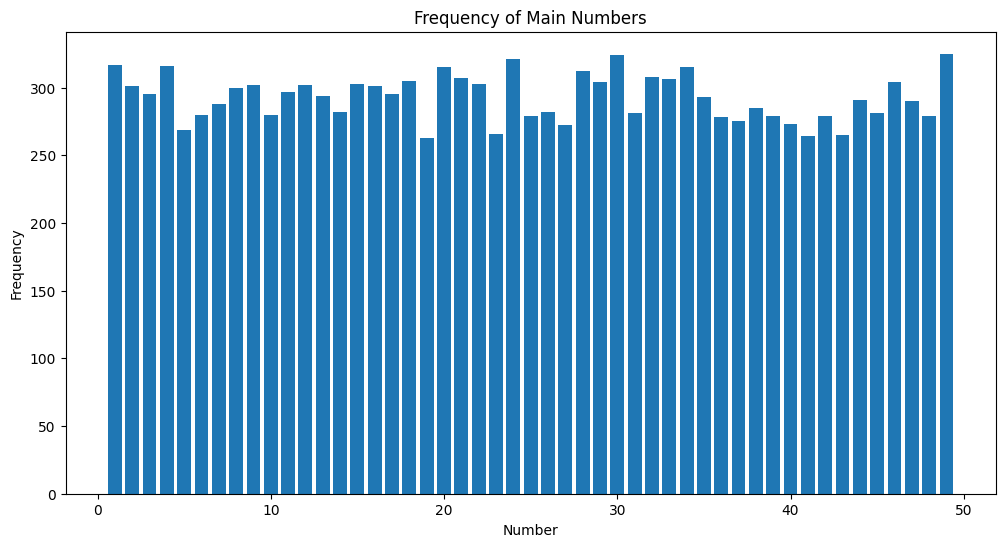

In [1]:
# Cell 1: Import libraries and define functions

import pandas as pd
import numpy as np
from collections import Counter
from sklearn.cluster import KMeans
from google.colab import files
import matplotlib.pyplot as plt

# Load and preprocess data
def load_data(csv_file):
    df = pd.read_csv(csv_file)
    main_cols = ['Winning Number 1', '2', '3', '4', '5', '6']
    extra_col = 'Extra Number'

    # Extract main numbers and extra numbers
    main_numbers = df[main_cols].values  # Shape: (62, 6)
    extra_numbers = df[extra_col].values  # Shape: (62,)

    # Flatten main numbers for frequency analysis
    all_main_numbers = main_numbers.flatten()

    return df, main_numbers, extra_numbers, all_main_numbers

# Frequency analysis
def frequency_analysis(main_numbers, extra_numbers):
    main_freq = Counter(main_numbers)
    extra_freq = Counter(extra_numbers)

    print("Top 10 Most Frequent Main Numbers:")
    for num, freq in main_freq.most_common(10):
        print(f"Number {num}: {freq} times")

    print("\nTop 5 Most Frequent Extra Numbers:")
    for num, freq in extra_freq.most_common(5):
        print(f"Number {num}: {freq} times")

    return main_freq, extra_freq

# K-Means clustering prediction
def kmeans_prediction(main_numbers, extra_numbers, n_clusters=5):
    # Combine main and extra numbers for clustering
    data = np.hstack((main_numbers, extra_numbers.reshape(-1, 1)))  # Shape: (62, 7)

    # Apply K-Means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data)

    # Count draws per cluster
    cluster_counts = Counter(clusters)
    print("\nDraws per Cluster:", cluster_counts)

    # Find the most populated cluster
    most_populated_cluster = cluster_counts.most_common(1)[0][0]

    # Get centroid of the most populated cluster
    centroid = kmeans.cluster_centers_[most_populated_cluster]

    # Round centroid values to nearest integers and ensure they’re in 1–49 range
    predicted_numbers = np.clip(np.round(centroid).astype(int), 1, 49)

    # Ensure 6 unique main numbers
    main_pred = predicted_numbers[:6]
    while len(np.unique(main_pred)) < 6:
        main_pred = np.unique(np.append(main_pred, np.random.randint(1, 50)))
        main_pred = main_pred[:6]

    extra_pred = predicted_numbers[6]

    return sorted(main_pred), extra_pred, clusters

# Main execution
def main():
    # Upload CSV
    print("Upload your Mark Six CSV file:")
    uploaded = files.upload()
    csv_file = list(uploaded.keys())[0]
    print(f"Uploaded file: {csv_file}")

    # Load data
    df, main_numbers, extra_numbers, all_main_numbers = load_data(csv_file)
    print(f"Loaded {len(df)} draws from {csv_file}")

    # Frequency analysis
    main_freq, extra_freq = frequency_analysis(all_main_numbers, extra_numbers)

    # K-Means prediction
    main_pred, extra_pred, clusters = kmeans_prediction(main_numbers, extra_numbers)
    print("\nMachine Learning Prediction (K-Means Clustering):")
    print(f"Predicted Main Numbers: {main_pred}")
    print(f"Predicted Extra Number: {extra_pred}")

    # Frequency-based prediction for comparison
    freq_main = [num for num, _ in main_freq.most_common(6)]
    freq_extra = extra_freq.most_common(1)[0][0]
    print("\nFrequency-Based Prediction (for comparison):")
    print(f"Predicted Main Numbers: {sorted(freq_main)}")
    print(f"Predicted Extra Number: {freq_extra}")

    # Visualization: Frequency of main numbers
    plt.figure(figsize=(12, 6))
    plt.bar(main_freq.keys(), main_freq.values())
    plt.title("Frequency of Main Numbers")
    plt.xlabel("Number")
    plt.ylabel("Frequency")
    plt.show()

if __name__ == "__main__":
    main()